In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
feature_name_df = pd.read_csv('human_activity/features.txt',
                              sep='\s+',
                             header=None,
                             names=['column_index','column_name'])

In [8]:
feature_name_df

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [9]:
feature_name = feature_name_df.iloc[:,1].values.tolist()
feature_name[:10] #앞쪽부터 10개만 뽑을거야

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [12]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df[feature_dup_df['column_index']>1].count() #중복되는 데이터만 보기

column_index    42
dtype: int64

In [13]:
feature_dup_df[feature_dup_df['column_index']>1].head(3) #중복되는 데이터 중 3개만 보기

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3


In [29]:
def get_new_feature_name_df(old):
    feature_dup_df = pd.DataFrame(data=old.groupby('column_name').cumcount(), #'column_name'이 같은 것끼리 묶을거, 같은 데이터끼리 묶어서 번호 매겨줌
                                 columns=['dup_cnt']) 
    feature_dup_df = feature_dup_df.reset_index() #기존의 인덱스값을 컬럼으로 만들기
    new_feature_name_df = pd.merge(old.reset_index(),feature_dup_df,how='outer') #이름이 같은 컬럼을 매칭시켜 옆으로 이동
    new_feature_name_df['column_name']=new_feature_name_df[['column_name','dup_cnt']].apply(lambda x:x[0]+'_'+str(x[1]) if x[1] > 0 else x[0] , axis=1) #앞인덱스는0 뒤는1로 접근
    new_feature_name_df = new_feature_name_df.drop(columns=['index'])
    return new_feature_name_df

In [30]:
df = get_new_feature_name_df(feature_name_df)
df[df['dup_cnt']>0]

,column_index,column_name,dup_cnt
316,317,"fBodyAcc-bandsEnergy()-1,8_1",1
317,318,"fBodyAcc-bandsEnergy()-9,16_1",1
318,319,"fBodyAcc-bandsEnergy()-17,24_1",1
319,320,"fBodyAcc-bandsEnergy()-25,32_1",1
320,321,"fBodyAcc-bandsEnergy()-33,40_1",1
...,...,...,...
497,498,"fBodyGyro-bandsEnergy()-17,32_2",2
498,499,"fBodyGyro-bandsEnergy()-33,48_2",2
499,500,"fBodyGyro-bandsEnergy()-49,64_2",2
500,501,"fBodyGyro-bandsEnergy()-1,24_2",2


In [33]:
def get_human_dataset():
    feature_name_df = pd.read_csv('human_activity/features.txt',
                              sep='\s+',
                             header=None,
                             names=['column_index','column_name'])
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()
    X_train = pd.read_csv('human_activity/train/X_train.txt',sep='\s+',names=feature_name)
    X_test = pd.read_csv('human_activity/test/X_test.txt',sep='\s+',names=feature_name)
    y_train = pd.read_csv('human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    return X_train,X_test,y_train,y_test

In [34]:
get_human_dataset()

(      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
 0              0.288585          -0.020294          -0.132905   
 1              0.278419          -0.016411          -0.123520   
 2              0.279653          -0.019467          -0.113462   
 3              0.279174          -0.026201          -0.123283   
 4              0.276629          -0.016570          -0.115362   
 ...                 ...                ...                ...   
 7347           0.299665          -0.057193          -0.181233   
 7348           0.273853          -0.007749          -0.147468   
 7349           0.273387          -0.017011          -0.045022   
 7350           0.289654          -0.018843          -0.158281   
 7351           0.351503          -0.012423          -0.203867   
 
       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
 0            -0.995279         -0.983111         -0.913526         -0.995112   
 1            -0.998245         -0.975300   

In [35]:
X_train,X_test,y_train,y_test = get_human_dataset() #따로 볼 때 

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [38]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 12.6 MB


In [39]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [40]:
y_test['action'].value_counts()

6    537
5    532
1    496
4    491
2    471
3    420
Name: action, dtype: int64

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [42]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.8547675602307431

In [44]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 156,
 'splitter': 'best'}

In [45]:
from sklearn.model_selection import GridSearchCV

In [55]:
params = {'max_depth':[6,8,10,12,16,20,24]}

In [48]:
gridcv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [49]:
cv_result_df = pd.DataFrame(gridcv.cv_results_)

In [51]:
cv_result_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [52]:
cv_result_df[['param_max_depth','mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [59]:
max_depth=[6,8,10,12,16,20,24]
for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth,random_state=156)
    dt_clf.fit(X_train,y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    print(f'max_depth:{depth}, 정확도:{accuracy:.4f}')

max_depth:6, 정확도:0.8558
max_depth:8, 정확도:0.8707
max_depth:10, 정확도:0.8673
max_depth:12, 정확도:0.8646
max_depth:16, 정확도:0.8575
max_depth:20, 정확도:0.8548
max_depth:24, 정확도:0.8548


In [60]:
params = {'max_depth':[8,12,16,20],'min_samples_split':[16,24]}

In [61]:
gridcv=GridSearchCV(dt_clf,param_grid=params,scoring='accuracy',cv=5,verbose=1)
gridcv.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24, random_state=156),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [62]:
gridcv.best_score_

0.8548794147162603

In [63]:
gridcv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [64]:
best_df_clf = gridcv.best_estimator_

In [65]:
pred = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)
accuracy

0.8717339667458432

In [66]:
best_df_clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.00175182,
       0.        , 0.        , 0.        , 0.        , 0.00217984,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00034009, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00997154, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.00122902,
       0.00629033, 0.        , 0.2533544 , 0.002077  , 0.00291231,
       0.        , 0.        , 0.02047009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.0024461 , 0.        , 0.        ,
       0.        , 0.00302454, 0.        , 0.        , 0.10188

In [73]:
ftr_importance = pd.Series(best_df_clf.feature_importances_,index=X_train.columns)

In [74]:
top20 = ftr_importance.sort_values(ascending=False)[:20]

In [75]:
import seaborn as sns

<AxesSubplot:>

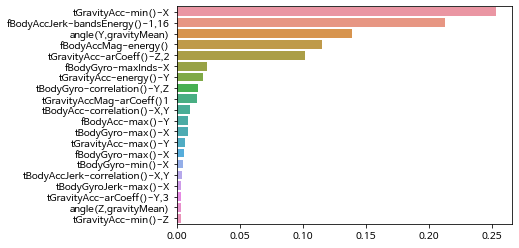

In [76]:
sns.barplot(x=top20,y=top20.index)

### p211 앙상블학습